### Takes best_returns of QA model and plot's the similarities

#### Calculating Similarity

In [1]:
import json
from difflib import SequenceMatcher

In [2]:
def calculate_similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()

def clean_text(text):
    special_characters = ['.', ',', '!', '?', ':', ';']
    for char in special_characters:
        text = text.replace(char, '')
    return text.strip().lower()

In [3]:
best_returns_path = '../qa_results/best_returns.json'
similarity_result_added_path = f'{best_returns_path[:-5]}_similarity.json'
data = json.load(open(best_returns_path))

In [4]:
for item in data:
    similarity = calculate_similarity(clean_text(item['Answer']), clean_text(item['Best_Answer']))
    item["Calculated_Similarity"] = similarity

In [5]:
with open(similarity_result_added_path, 'w') as f:
    json.dump(data, f, indent=4)

#### Plotting Results

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator


In [7]:
data_with_similarities = json.load(open(similarity_result_added_path))

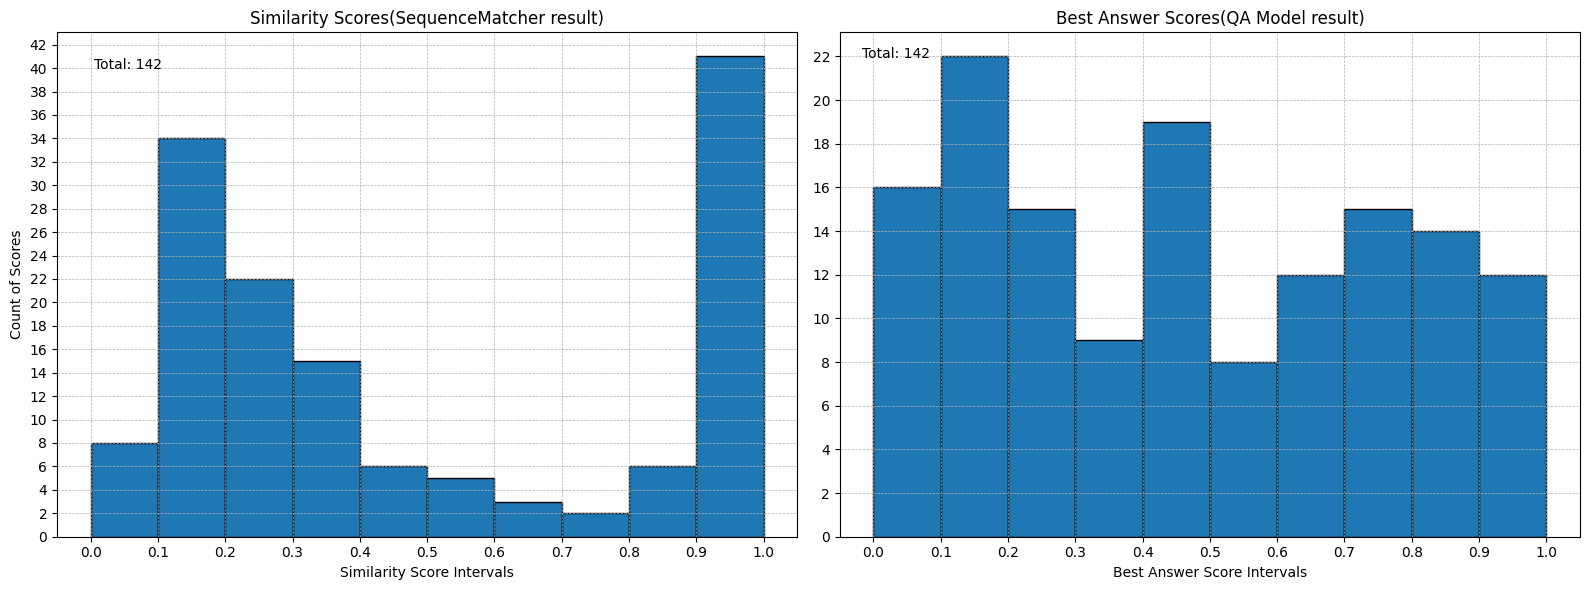

In [8]:
similarities = [item['Calculated_Similarity'] for item in data_with_similarities]
best_answer_scores = [item['Best_Answer_Score'] for item in data_with_similarities]
total_data = len(similarities)

bins = [i * 0.1 for i in range(11)]

fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

axs[0].hist(similarities, bins=bins, edgecolor='black')
axs[0].xaxis.set_major_locator(MultipleLocator(0.1))
axs[0].yaxis.set_major_locator(MultipleLocator(2))
axs[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
axs[0].set_title('Similarity Scores(SequenceMatcher result)')
axs[0].set_xlabel('Similarity Score Intervals')
axs[0].set_ylabel('Count of Scores')
axs[0].text(0.05, 0.95, f'Total: {total_data}', transform=axs[0].transAxes, verticalalignment='top')

axs[1].hist(best_answer_scores, bins=bins, edgecolor='black')
axs[1].xaxis.set_major_locator(MultipleLocator(0.1))
axs[1].yaxis.set_major_locator(MultipleLocator(2))
axs[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
axs[1].set_title('Best Answer Scores(QA Model result)')
axs[1].set_xlabel('Best Answer Score Intervals')
axs[1].text(0.03, 0.97, f'Total: {total_data}', transform=axs[1].transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()


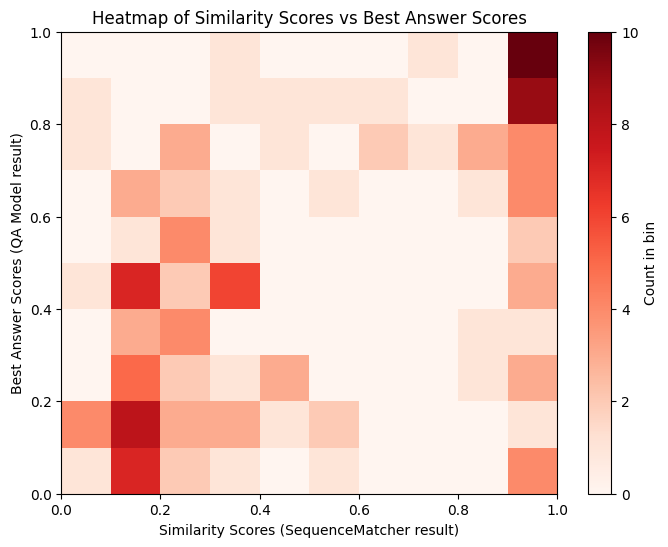

In [9]:
similarities = [item['Calculated_Similarity'] for item in data_with_similarities]
best_answer_scores = [item['Best_Answer_Score'] for item in data_with_similarities]

# Define the number of bins for each axis
xbins = np.arange(0, 1.1, 0.1)
ybins = np.arange(0, 1.1, 0.1)

# Create the heatmap
plt.figure(figsize=(8, 6))
plt.hist2d(similarities, best_answer_scores, bins=[xbins, ybins], cmap='Reds')
plt.colorbar(label='Count in bin')

plt.title('Heatmap of Similarity Scores vs Best Answer Scores')
plt.xlabel('Similarity Scores (SequenceMatcher result)')
plt.ylabel('Best Answer Scores (QA Model result)')

plt.show()